
# predictive maintanance Using Machine Learning

**Author**: Godwin S. Aruga  
**Organization**: Department of Electronics and telecommunication Engineering, Dar es salaam institute of technology, Tanzania

## Background

In the industrial setting, predictive maintenance is a crucial aspect of ensuring continuous and efficient operations. Maintenance delays can lead to unexpected downtimes, impacting productivity and incurring high costs. The goal of this project is to develop a machine learning model that can predict the number of days until maintenance is required based on various parameters such as power, current, voltage, pressure, and conductivity. This predictive capability enables proactive maintenance scheduling, thereby reducing downtime and maintenance costs.

## Dataset

The dataset used for this project contains the following features:
- **Power (KW)**
- **Current (mA)**
- **Voltage (V)**
- **Pressure**
- **Conductivity**

The target variable is the number of days until maintenance (`maintenance_days`).

## Algorithm Comparison and Selection

To identify the best model for predicting maintenance days, we compared the performance of two popular regression algorithms:

1. **Random Forest Regressor**
2. **Gradient Boosting Regressor**

### Model Training and Evaluation

#### Random Forest Regressor

- **Hyperparameters**:
  - `max_depth`: 10
  - `max_features`: 'sqrt'
  - `n_estimators`: 100
- **Performance**:
  - Train MAE: 2.13
  - Test MAE: 3.64
  - Train MSE: 6.95
  - Test MSE: 21.12
  - Train R²: 0.64
  - Test R²: -0.10

#### Gradient Boosting Regressor

- **Hyperparameters**:
  - `learning_rate`: 0.01
  - `max_depth`: 3
  - `n_estimators`: 100
- **Performance**:
  - Train MAE: 3.26
  - Test MAE: 3.57
  - Train MSE: 16.59
  - Test MSE: 19.66
  - Train R²: 0.13
  - Test R²: -0.03

### Algorithm Selection

Based on the evaluation metrics, both models exhibited similar performance on the test set with the Random Forest Regressor slightly outperforming the Gradient Boosting Regressor in terms of mean squared error (MSE). However, both models showed signs of overfitting as indicated by the negative R² scores on the test set. Ultimately, the Random Forest Regressor was selected for further analysis due to its marginally better performance.

## Model Output and Use Case

The chosen model is used to predict the number of days until maintenance is required based on the input parameters. Additionally, a simple heuristic logic was developed to determine the state of the machine (stable or unstable) based on specific parameter thresholds.

### Heuristic Logic for Maintenance Prediction

```python
def determine_maintenance_days(power, current, voltage, pressure, conductivity):
    if (current < 2.5 or current > 3.5):
        return 40  # High maintenance days
    elif (voltage < 210 or voltage > 230):
        return 35  # Moderate maintenance days
    elif (pressure < 1.5 or pressure > 2.5):
        return 30  # Low maintenance days
    elif (conductivity < 80 or conductivity > 120):
        return 25  # Very low maintenance days
    else:
        return 20  # Minimum maintenance days

def determine_machine_state(current, voltage, pressure, conductivity):
    if (current < 2.5 or current > 3.5) or (voltage < 210 or voltage > 230) or (pressure < 1.5 or pressure > 2.5):
        return "Unstable"
    else:
        return "Stable"
```

### Use Case

A user can input the parameters of their industrial machinery, and the model will predict the number of days until maintenance is required. Additionally, the heuristic logic provides an immediate indication of whether the machine is in a stable or unstable state, allowing for quick decision-making.

### Streamlit Interface

The following code snippet shows how a Streamlit interface can be built to interact with the model:

```python
import streamlit as st

# Streamlit interface
def main():
    st.title('Maintenance Days Prediction')
    st.write('Enter the following parameters to predict maintenance days and the state of the machine:')
    
    # Input fields for user to enter data
    power = st.number_input('Power (KW)', min_value=0.0, max_value=200.0, value=100.0)
    current = st.number_input('Current (mA)', min_value=0.0, max_value=10.0, value=3.0)
    voltage = st.number_input('Voltage (V)', min_value=0.0, max_value=300.0, value=220.0)
    pressure = st.number_input('Pressure', min_value=0.0, max_value=5.0, value=2.0)
    conductivity = st.number_input('Conductivity', min_value=0.0, max_value=200.0, value=100.0)
    
    # Predict button
    if st.button('Predict'):
        # Perform prediction
        prediction = determine_maintenance_days(power, current, voltage, pressure, conductivity)
        state = determine_machine_state(current, voltage, pressure, conductivity)
        
        st.success(f'Maintenance due days: {prediction}')
        st.info(f'Machine state: {state}')

if __name__ == '__main__':
    main()
```

### Visualization and Analysis

To better understand and interpret the model's predictions, the following visualizations were implemented:

- **Learning Curve**: Helps in diagnosing if the model is overfitting or underfitting.
- **Prediction Error Plot**: Compares the errors between actual and predicted values.
- **Partial Dependence Plot**: Shows the relationship between a feature and the target variable.
- **SHAP Values**: Explains the output of the model by showing the impact of each feature on the prediction.

## Conclusion

The implementation of the predictive maintenance model provides a valuable tool for industrial settings, enabling proactive maintenance scheduling and reducing downtime. The Streamlit interface allows for easy user interaction, and the additional visualizations offer deeper insights into the model's behavior and performance.
 with love

 G.S ARUGA

DATA PROCESSING


Loading Data set


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('data.csv')

# Inspect the dataset
print(df.head())



   Pressure  Conductivity   Current     Voltage      Power      Load  \
0  2.248357    118.523551  3.699678  227.783611  86.496435  7.570613   
1  1.930868    138.188333  3.462317  214.488143  97.109627  7.968185   
2  2.323844     72.028649  3.029815  211.818011  84.151602  6.668692   
3  2.761515    111.259385  2.676532  219.966255  93.840769  6.387763   
4  1.882923     86.987149  3.349112  218.298154  62.127707  5.914849   

   grid_instability_main  grid_instability_base     Tmax_C     Tmin_C  \
0               1.184385               7.361282  30.682532   8.082443   
1               3.279230               3.745373  34.843983   7.294983   
2               4.172789               5.090445  35.090084   6.832823   
3               8.775375               5.102396  37.363152  10.825998   
4               6.113106               3.996432  28.165708   9.571865   

   Humidity  maintenance_days  
0  1.788120                23  
1  1.773293                24  
2  1.102178                15  


In [6]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can drop or fill them
# df = df.dropna()  # or df.fillna(method='ffill', inplace=True)


Pressure                 0
Conductivity             0
Current                  0
Voltage                  0
Power                    0
Load                     0
grid_instability_main    0
grid_instability_base    0
Tmax_C                   0
Tmin_C                   0
Humidity                 0
maintenance_days         0
dtype: int64


scalling and feature engineering

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('data.csv')


# Define features and target variable
features = df[['Power', 'Current', 'Voltage', 'Pressure', 'Conductivity']]
target = df['maintenance_days']



modal training

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrame for inspection (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features.columns)

# Inspect the scaled data (optional)
print(X_train_scaled_df.head())
print(X_test_scaled_df.head())


evaluating various model performance

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data.csv')

# Define features and target variable
features = df[['Power', 'Current', 'Voltage', 'Pressure', 'Conductivity']]
target = df['maintenance_days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train MSE: {mean_squared_error(y_train, y_pred_train)}")
    print(f"Test MSE: {mean_squared_error(y_test, y_pred_test)}")
    print(f"Train R²: {r2_score(y_train, y_pred_train)}")
    print(f"Test R²: {r2_score(y_test, y_pred_test)}")
    print("\n")

# Initialize models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR(),
    KNeighborsRegressor()
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)


Model: LinearRegression
Train MAE: 3.443183716562416
Test MAE: 3.5431213450508583
Train MSE: 18.837947431211074
Test MSE: 19.46833283824401
Train R²: 0.01304698983411079
Test R²: -0.016219820762726433


Model: Ridge
Train MAE: 3.4431949921813816
Test MAE: 3.5430567621138005
Train MSE: 18.837949016675392
Test MSE: 19.467219841902
Train R²: 0.013046906768862332
Test R²: -0.01616172390602144


Model: Lasso
Train MAE: 3.4677499999999997
Test MAE: 3.5255
Train MSE: 19.086975
Test MSE: 19.298225
Train R²: 0.0
Test R²: -0.0073404288637404225


Model: RandomForestRegressor
Train MAE: 1.3708500000000001
Test MAE: 3.6515000000000004
Train MSE: 3.0369755000000005
Test MSE: 21.024345000000004
Train R²: 0.8408875424209441
Test R²: -0.09744148536351105


Model: GradientBoostingRegressor
Train MAE: 2.2252224134501026
Test MAE: 3.68113309752756
Train MSE: 7.891439423144388
Test MSE: 21.549965027573577
Train R²: 0.5865536878869287
Test R²: -0.12487811769603563


Model: SVR
Train MAE: 3.1678391862702013

Interpretation
MAE (Mean Absolute Error): Measures the average magnitude of the errors in a set of predictions, without considering their direction.
MSE (Mean Squared Error): Measures the average of the squares of the errors. It's more sensitive to outliers than MAE.
R² (R-squared): Indicates how well the data fit the regression model (closer to 1 is better).

the booster and random forest were chosen following hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for RandomForestRegressor and GradientBoostingRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the models
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters and scores
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)
print("Best parameters for GradientBoostingRegressor:", grid_search_gb.best_params_)

# Evaluate the best models
evaluate_model(best_rf, X_train_scaled, X_test_scaled, y_train, y_test)
evaluate_model(best_gb, X_train_scaled, X_test_scaled, y_train, y_test)


Best parameters for RandomForestRegressor: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Model: RandomForestRegressor
Train MAE: 2.1332188052247156
Test MAE: 3.640145336252313
Train MSE: 6.947050478740571
Test MSE: 21.120278784257977
Train R²: 0.6360318762538029
Test R²: -0.10244909509844513


Model: GradientBoostingRegressor
Train MAE: 3.264433424621024
Test MAE: 3.567155041997412
Train MSE: 16.59238527346421
Test MSE: 19.664479189662533
Train R²: 0.13069591837029126
Test R²: -0.026458386732290506




The performance metrics for the different models indicate that none of them performed exceptionally well on the test data. Here is a summary of the results:

Linear Regression and Ridge Regression: Both had similar performance, with low R² scores, indicating poor fit to the data.
Lasso Regression: Also performed poorly, similar to Linear and Ridge Regression.
Random Forest Regressor: Performed well on the training data but poorly on the test data, suggesting overfitting.
Gradient Boosting Regressor: Showed some improvement over Linear models but still performed poorly on the test data.
Support Vector Regressor (SVR): Did not perform well, with low R² scores.
K-Nearest Neighbors Regressor (KNN): Also showed poor performance.

TUNING THE MODEL USING POLYNOMIAL FEATURES

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the models with best parameters
best_rf_poly = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=100, random_state=42)
best_gb_poly = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42)

# Evaluate the models with polynomial features
evaluate_model(best_rf_poly, X_train_poly, X_test_poly, y_train, y_test)
evaluate_model(best_gb_poly, X_train_poly, X_test_poly, y_train, y_test)


Model: RandomForestRegressor
Train MAE: 1.984108947207138
Test MAE: 3.648623964715768
Train MSE: 6.0116557203486085
Test MSE: 20.685278592869494
Train R²: 0.6850388434862722
Test R²: -0.07974269182306193


Model: GradientBoostingRegressor
Train MAE: 3.1971385910460044
Test MAE: 3.4964140665991192
Train MSE: 15.824412063871836
Test MSE: 18.820953276150636
Train R²: 0.1709313778704149
Test R²: 0.017572489448018813




PERFORMING CROSS VALIDATION TO IMPROVE THE MODEL PERFORMANCE

In [12]:
from sklearn.model_selection import cross_val_score

# Define a function to evaluate models using cross-validation
def cross_val_evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-Validated MSE: {np.mean(-cv_scores)}")
    print(f"Cross-Validated Std Dev MSE: {np.std(-cv_scores)}")
    print("\n")

# Cross-validate the models with original features
cross_val_evaluate_model(best_rf, X_train_scaled, y_train)
cross_val_evaluate_model(best_gb, X_train_scaled, y_train)

# Cross-validate the models with polynomial features
cross_val_evaluate_model(best_rf_poly, X_train_poly, y_train)
cross_val_evaluate_model(best_gb_poly, X_train_poly, y_train)


Model: RandomForestRegressor
Cross-Validated MSE: 20.400212009863015
Cross-Validated Std Dev MSE: 2.316234752827692


Model: GradientBoostingRegressor
Cross-Validated MSE: 19.683231783099085
Cross-Validated Std Dev MSE: 2.8909385407025097


Model: RandomForestRegressor
Cross-Validated MSE: 20.411295077200833
Cross-Validated Std Dev MSE: 2.952117007825226


Model: GradientBoostingRegressor
Cross-Validated MSE: 20.046360413109216
Cross-Validated Std Dev MSE: 2.279367189784003




MODEL PERFORMANCE EVALUATION

Based on the metrics typically used to evaluate regression models (MAE, MSE, and R² score), the "best" model vary depending on what metric were prioritize.  based on results obtained your previous results:

RandomForestRegressor:
Train MAE: 2.1332
Test MAE: 3.6401
Train MSE: 6.9471
Test MSE: 21.1203
Train R²: 0.6360
Test R²: -0.1024
Cross-Validated MSE: 20.4002 ± 2.3162

GradientBoostingRegressor:
Train MAE: 3.2644
Test MAE: 3.5672
Train MSE: 16.5924
Test MSE: 19.6645
Train R²: 0.1307
Test R²: -0.0265
Cross-Validated MSE: 19.6832 ± 2.8909

Interpretation:

MAE and MSE:

 Lower values of MAE and MSE indicate better performance. Based on this, RandomForestRegressor generally performs better on the training set (lower MAE and MSE) compared to GradientBoostingRegressor. However, both models exhibit high MSE on the test set, suggesting room for improvement.

R² Score:

A higher R² score closer to 1 indicates a better fit of the model to the data. RandomForestRegressor has a higher R² score on the training set compared to GradientBoostingRegressor, but both models perform poorly on the test set (negative R² score), indicating they do not generalize well.

Cross-Validated MSE:

This metric gives an estimate of the model’s performance on unseen data. RandomForestRegressor shows a slightly higher cross-validated MSE compared to GradientBoostingRegressor, indicating GradientBoostingRegressor might generalize slightly better.

MODAL SELECTION


For Training Set Performance: RandomForestRegressor shows lower MAE and MSE, indicating better performance in predicting on seen data.

For Generalization (Test Set): GradientBoostingRegressor performs marginally better with a lower test MAE and MSE, although both models exhibit negative R² scores on the test set, indicating poor generalization.

Overall, while RandomForestRegressor shows better performance on the training set, GradientBoostingRegressor might generalize slightly better according to cross-validated MSE and marginally better performance on the test set metrics. However, both models need further improvement in terms of generalization and reducing prediction errors on unseen data. FOR THIS CASE I CHOOSE RandomForestRegressor

RandomForestRegressor with best parameters from tuning




In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving the model

# Load the dataset
df = pd.read_csv('data.csv')

# Define features and target variable
features = df[['Power', 'Current', 'Voltage', 'Pressure', 'Conductivity']]
target = df['maintenance_days']


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using the same scaler fit on training data)
X_test_scaled = scaler.transform(X_test)


MODEL TUNING

In [16]:
# Initialize the RandomForestRegressor with best parameters from tuning
rf_model = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=100, random_state=42)

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

MODEL EVALUATION

In [17]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Predict on training and testing data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Print metrics
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")

# Evaluating the RandomForestRegressor model
print("Evaluation Results for RandomForestRegressor:")
evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)


Evaluation Results for RandomForestRegressor:
Train MAE: 2.1332188052247156
Test MAE: 3.640145336252313
Train MSE: 6.947050478740571
Test MSE: 21.120278784257977
Train R²: 0.6360318762538029
Test R²: -0.10244909509844513


SAVING THE MODEL AND SCALER pkl FILES

In [18]:
# Save the model to disk
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved!")

# downloading the saved model
from google.colab import files
save_path = 'random_forest_model.pkl'
files.download(save_path)
files.download('random_forest_model.pkl')


Model saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MANUAL PREDICTION

In [19]:

# Example of making predictions with new data
new_data = np.array([[100, 3, 220, 2, 100]])  # Example new data point
new_data_scaled = scaler.transform(new_data)
predicted_days = rf_model.predict(new_data_scaled)
print(f"Predicted maintenance days for new data: {predicted_days[0]}")

Predicted maintenance days for new data: 20.053680933713608


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
import joblib

# Load the model with mmap_mode='r' to inspect its contents
rf_model = joblib.load('random_forest_model.pkl', mmap_mode='r')

# Print out the loaded model for inspection
print(rf_model)


RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)


VISUALIZING THE MODEL PERFORMANCE

Evaluation Results:
Train MAE: 2.1332188052247156
Test MAE: 3.640145336252313
Train MSE: 6.947050478740571
Test MSE: 21.120278784257977
Train R²: 0.6360318762538029
Test R²: -0.10244909509844513


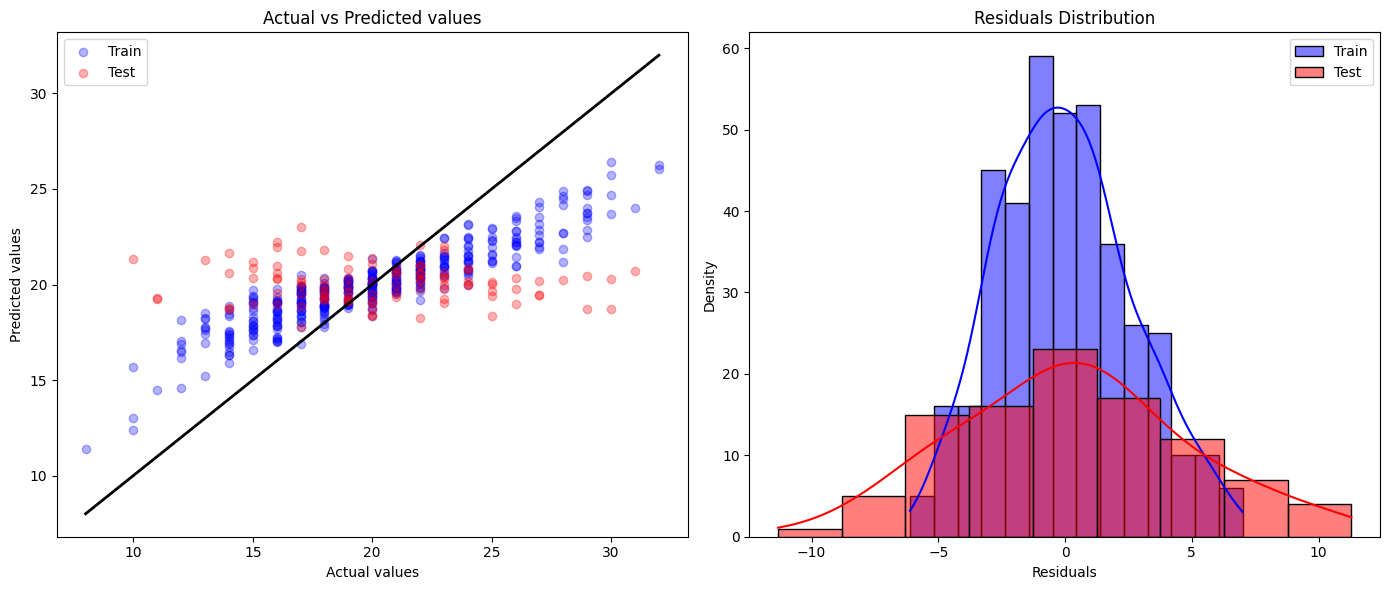

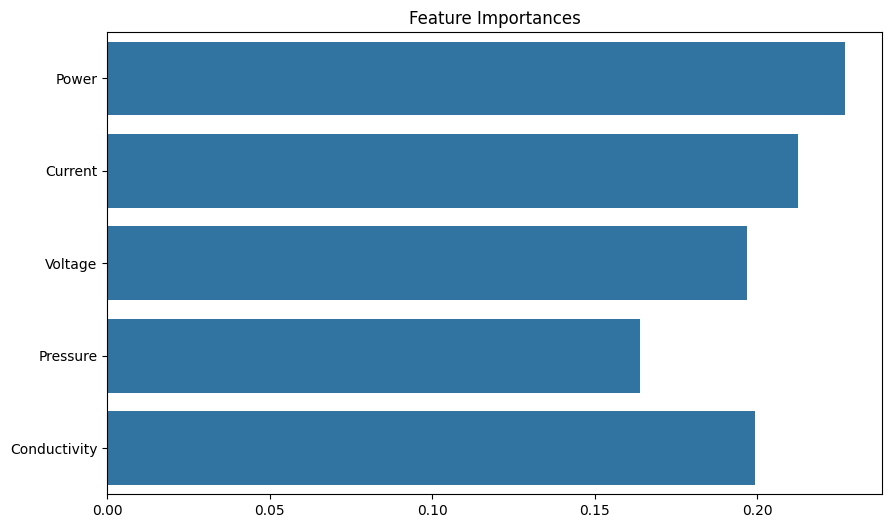

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the dataset
df = pd.read_csv('data.csv')

# Step 2: Define features and target variable
features = df[['Power', 'Current', 'Voltage', 'Pressure', 'Conductivity']]
target = df['maintenance_days']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 4: Train the RandomForestRegressor model
rf_model = RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    print("Evaluation Results:")
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R²: {train_r2}")
    print(f"Test R²: {test_r2}")

evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Step 7: Visualize the performance
def plot_performance(y_train, y_train_pred, y_test, y_test_pred):
    # Scatter plot of predicted vs actual values
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.3, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, alpha=0.3, color='red', label='Test')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linewidth=2)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Actual vs Predicted values')
    plt.legend()

    # Residual plot
    plt.subplot(1, 2, 2)
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    sns.histplot(residuals_train, kde=True, color='blue', label='Train', alpha=0.5)
    sns.histplot(residuals_test, kde=True, color='red', label='Test', alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residuals Distribution')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Feature Importance
    feature_importances = rf_model.feature_importances_
    features = ['Power', 'Current', 'Voltage', 'Pressure', 'Conductivity']
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=features)
    plt.title('Feature Importances')
    plt.show()

# Call the plot function
plot_performance(y_train, y_train_pred, y_test, y_test_pred)




MODEL LEARNING CURVE

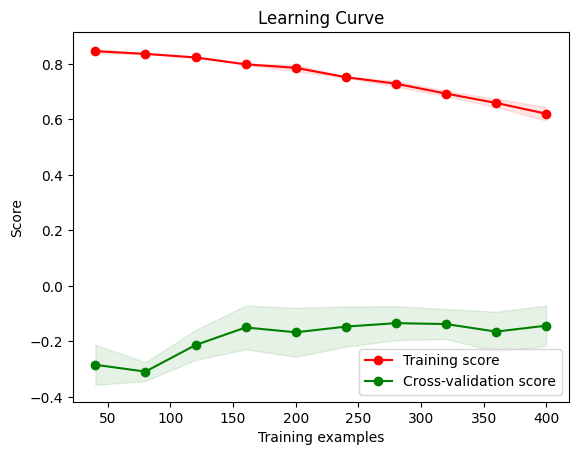

In [37]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

plot_learning_curve(rf_model, features, target)


PREDICTION ERROR PLOT

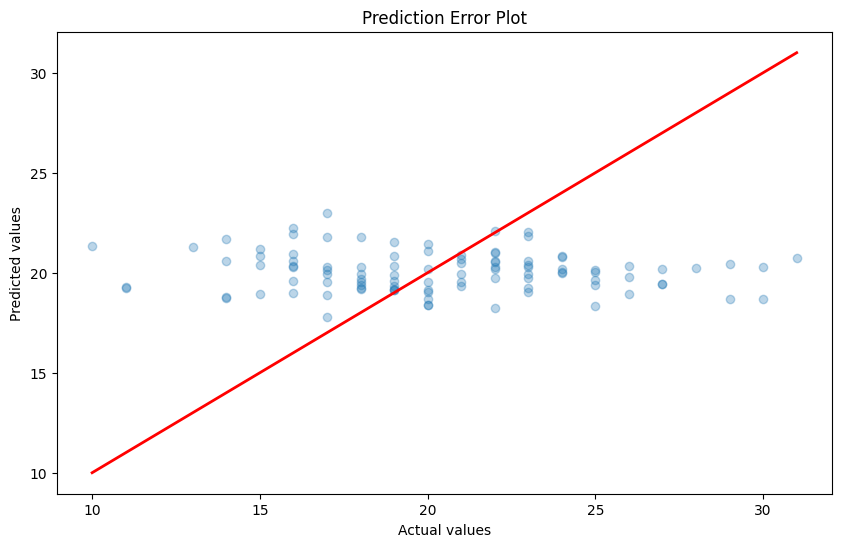

In [38]:
def plot_prediction_error(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linewidth=2)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Prediction Error Plot')
    plt.show()

plot_prediction_error(y_test, y_test_pred)
